In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('ggplot')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree

### Get the data

In [3]:
titanic = pd.read_csv('./titanic_data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

### Check for NaN values in Dataset

In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualize Data

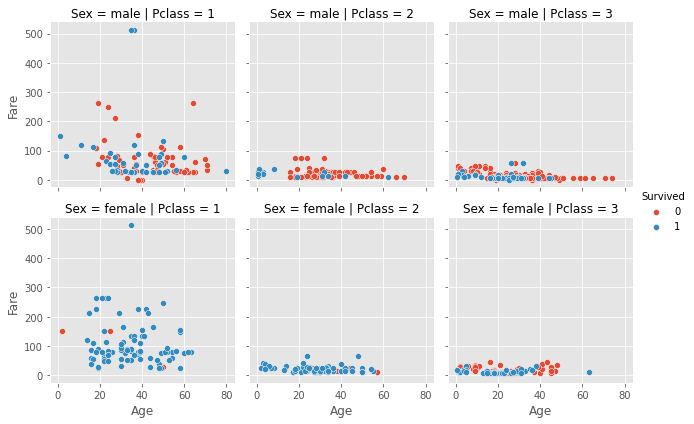

In [6]:
g = sns.FacetGrid(data=titanic, hue='Survived', col='Pclass', row='Sex')
g.map(sns.scatterplot, 'Age', 'Fare')
g.add_legend()

### Select columns for Feature Matrix (X) and target(y)

In [7]:
X = titanic[['Pclass', 'Sex', 'Age']]

y = titanic['Survived']

### Splitting data into train and test data set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
X_train.shape, X_test.shape

((668, 3), (223, 3))

### Perform feature engineering

In [10]:
X_train.head()

,Pclass,Sex,Age
113,3,female,20.0
332,1,male,38.0
208,3,female,16.0
462,1,male,47.0
358,3,female,NaN


In [11]:
# Before transformation, how many NaN values are in column

X_train.isna().sum()

Pclass      0
Sex         0
Age       129
dtype: int64

### Pipeline to create our own custom preprocessor

In [12]:
impute_scale = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)


### ColumnTransformer

#### It applies different FE techniques to raw data

In [13]:
fe = ColumnTransformer([
#     (name, transformer, column-names)
#     ('Imputer',SimpleImputer(strategy='mean'),['Age']),
#     ('Scaler', MinMaxScaler(), ['Age'])
    ('Impute and Scale', impute_scale, ['Age']),
    ('One-Hot Encoder', OneHotEncoder(sparse=False), ['Sex', 'Pclass'])
])

In [14]:
# fit the column transformer on the training data

fe.fit(X_train)

ColumnTransformer(transformers=[('Impute and Scale',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age']),
                                ('One-Hot Encoder', OneHotEncoder(sparse=False),
                                 ['Sex', 'Pclass'])])

In [15]:
# transform the training data

X_train_trans = fe.transform(X_train)
pd.DataFrame(X_train_trans)

,0,1,2,3,4,5
0,0.246042,1.0,0.0,0.0,0.0,1.0
1,0.472229,0.0,1.0,1.0,0.0,0.0
2,0.195778,1.0,0.0,0.0,0.0,1.0
3,0.585323,0.0,1.0,1.0,0.0,0.0
4,0.363349,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
663,0.497361,1.0,0.0,0.0,1.0,0.0
664,0.547625,1.0,0.0,1.0,0.0,0.0
665,0.566474,0.0,1.0,1.0,0.0,0.0
666,0.560191,1.0,0.0,0.0,0.0,1.0


In [16]:
# Training data (Shape) after transformation

X_train_trans.shape

(668, 6)

In [17]:
# After transformation, how many NaN values are in column

pd.DataFrame(X_train_trans).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

## Model

In [18]:
# initialize the model
model = DecisionTreeClassifier(max_depth=2)

# fit the model on the transformed training data
model.fit(X_train_trans, y_train)

DecisionTreeClassifier(max_depth=2)

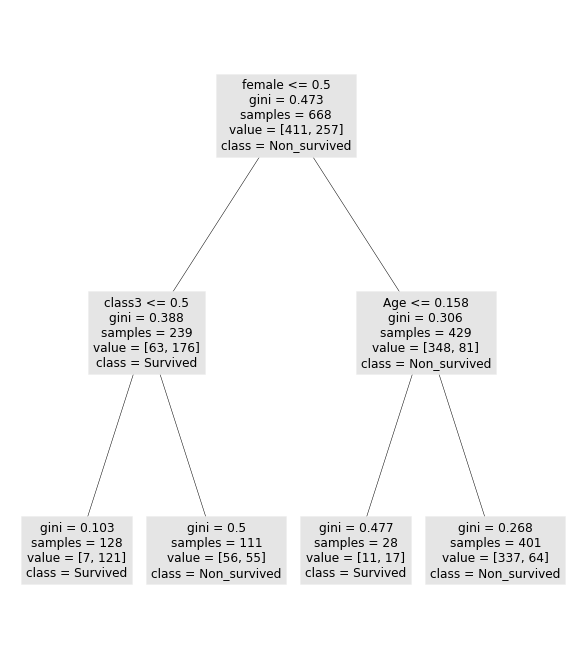

In [19]:
plt.figure(figsize=(10, 12))
t = plot_tree(model, 
              feature_names=['Age', 'male', 'female', 'class1', 'class2', 'class3'], 
              class_names=['Non_survived', 'Survived'])

In [20]:
# calculate predictions with the transformed training data

y_pred_train = model.predict(X_train_trans)
# y_pred_train

### Accuracy on the Training Data

In [21]:
accuracy_score(y_train, y_pred_train)

0.7949101796407185

In [22]:
# transform the test data

X_test_trans = fe.transform(X_test)

In [23]:
# calculate predictions with the transformed test data

y_pred_test = model.predict(X_test_trans)

### Accuracy on the Test Data

In [24]:
accuracy_score(y_test, y_pred_test)

0.7847533632286996

## Model's Performance

In [25]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[131,   7],
       [ 41,  44]], dtype=int64)

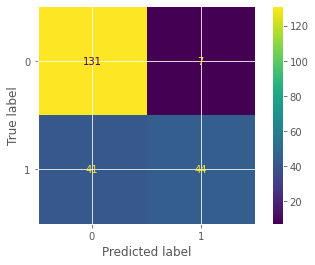

In [26]:
metrics.plot_confusion_matrix(model, X_test_trans, y_test)

## Applying Model to "Kaggle" Train & Test Datasets

### Get the data

In [27]:
titanic_test = pd.read_csv('./titanic_data/test.csv')

titanic_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
299,1191,3,"Johansson, Mr. Nils",male,29.00,0,0,347467,7.8542,NaN,S
53,945,1,"Fortune, Miss. Ethel Flora",female,28.00,3,2,19950,263.0000,C23 C25 C27,S
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.00,0,2,C.A. 33112,36.7500,NaN,S
226,1118,3,"Asplund, Mr. Johan Charles",male,23.00,0,0,350054,7.7958,NaN,S
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S


### Check for NaN values in Dataset

In [28]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Setting Feature Matrix (X) for Kaggle's Test Dataset

In [29]:
X_kaggle = titanic_test[['Pclass', 'Sex', 'Age']]

X_kaggle.sample(5)

,Pclass,Sex,Age
401,2,male,38.0
25,3,male,50.0
31,2,male,24.0
204,2,male,25.0
175,2,female,15.0


In [30]:
# transform the test data

X_kaggle_trans = fe.transform(X_kaggle)

pd.DataFrame(X_kaggle_trans)

,0,1,2,3,4,5
0,0.428248,0.0,1.0,0.0,0.0,1.0
1,0.585323,1.0,0.0,0.0,0.0,1.0
2,0.773813,0.0,1.0,0.0,1.0,0.0
3,0.334004,0.0,1.0,0.0,0.0,1.0
4,0.271174,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
413,0.363349,0.0,1.0,0.0,0.0,1.0
414,0.484795,1.0,0.0,1.0,0.0,0.0
415,0.478512,0.0,1.0,0.0,0.0,1.0
416,0.363349,0.0,1.0,0.0,0.0,1.0


In [31]:
y_prediction = model.predict(X_kaggle_trans)
# y_prediction

## Creating Kaggle submission File

In [32]:
output = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_prediction})
output.to_csv('./titanic_kaggle_submission/titanic_kaggle_submission.csv', index=False)